In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:

from Strategies.RSI.RSI import RSI
from Metrics.Metrics import SharpeRatio

1) This is a demo strategy based on on the RSI indicator. 
2) The input params to the strategy is [a,b,c] where a = Lookback for RSI, b=lower bound and c=upper bound. 
3) A buy signal is created when RSI crosses over lower bound from bottom to top. 
4) A sell signal is created when RSI crosses over upper bound from top to bottom.

Demonstrating Backtest

[*********************100%***********************]  1 of 1 completed


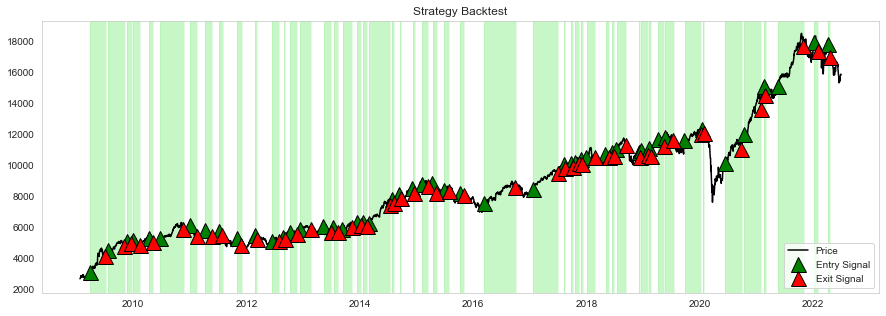

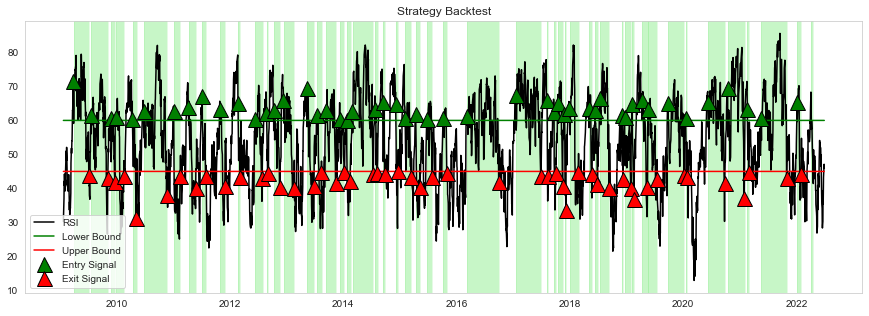

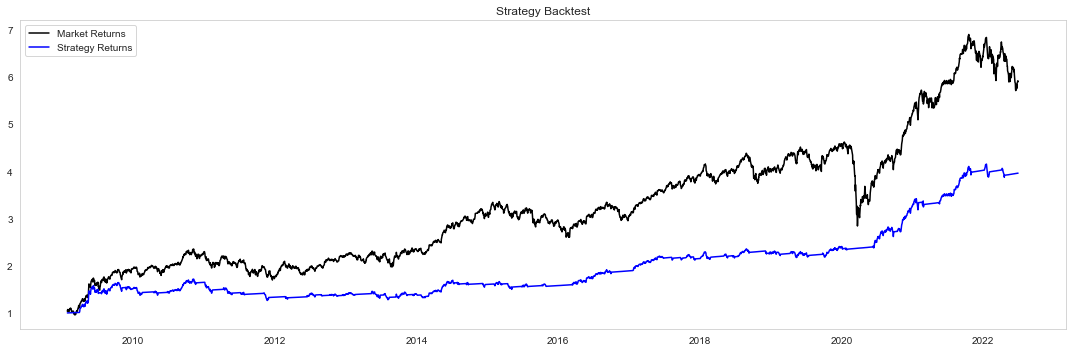

<Figure size 1080x360 with 0 Axes>

In [5]:
strat = RSI()
strat.get_data("^NSEI", "D")
params = [14, 45, 60]    
strat.data = strat.add_features(strat.data, [[param] for param in params])
_, ec = strat.do_backtest(params, allocation = 1, interest_rate = 6,  plot=True, save_plot_to=None)

Demonstrating the Parametric Optimisation Process

In [6]:
from BacktestOptimiser.BacktestOptimiser import BacktestOptimiser
from Utils.utils import correlation_filter

In [28]:
optimiser = BacktestOptimiser(strategy = RSI, ticker = "^NSEI", data_frequency = 'D')

print("Getting data")
optimiser.get_data()

print("Creating Dates")
optimiser.create_dates("3_Months")

print("Adding features")
optimiser.add_features()

print("run_backtests"),
optimiser.run_backtests(use_optimiser="BruteForce",parallelize=True)

print("Selecting Strategies")
optimiser.select_strategies(use_optimiser = "BruteForce",parallelize=True)

print("Checking Selected Strategies")
optimiser.check_selected_strategies(forward_months=2)

print("Filtering Strategies")
optimiser.filter_strategies(filter_function = correlation_filter)

print("Optimizing weights")
optimiser.optimize_weights()

print("Selecting best and mailing results")
optimiser.select_best_and_mail_results()



Getting data
[*********************100%***********************]  1 of 1 completed
Creating Dates
Adding features
run_backtests
Selecting Strategies
12_Done
Checking Selected Strategies


100%|██████████| 1/1 [00:35<00:00, 35.41s/it]


Filtering Strategies
Calculating sharpe of collected metrics


100%|██████████| 51/51 [04:43<00:00,  5.56s/it]


Using filter


100%|██████████| 51/51 [06:09<00:00,  7.24s/it]

Optimizing weights
Selecting best and mailing results


<Figure size 1080x360 with 0 Axes>

In [12]:
import pickle
with open("Caches/^NSEI/D/RSI/SelectedStrategies/All_12.pkl", 'rb') as file:
    all_strategies = pickle.load(file)
all_strategies

[{'Strategies':              params  metric_val                                 metric  \
  0      (14, 10, 15)         NaN  <function SharpeRatio at 0x1475d0040>   
  1      (14, 10, 20)         NaN  <function SharpeRatio at 0x1475d0040>   
  2      (14, 10, 25)         NaN  <function SharpeRatio at 0x1475d0040>   
  3      (14, 10, 30)         NaN  <function SharpeRatio at 0x1475d0040>   
  4      (14, 10, 35)         NaN  <function SharpeRatio at 0x1475d0040>   
  ...             ...         ...                                    ...   
  13926  (98, 95, 75)         NaN  <function SharpeRatio at 0x1475d0040>   
  13927  (98, 95, 80)         NaN  <function SharpeRatio at 0x1475d0040>   
  13928  (98, 95, 85)         NaN  <function SharpeRatio at 0x1475d0040>   
  13929  (98, 95, 90)         NaN  <function SharpeRatio at 0x1475d0040>   
  13930  (98, 95, 95)         NaN  <function SharpeRatio at 0x1475d0040>   
  
         Lookback  
  0            12  
  1            12  
  2        

In [17]:
all_strategies[-1]

{'Strategies':              params  metric_val                                 metric  \
 0      (28, 55, 40)    0.956480  <function SharpeRatio at 0x1475d0040>   
 1      (18, 60, 35)    0.951994  <function SharpeRatio at 0x1475d0040>   
 2      (18, 50, 35)    0.909845  <function SharpeRatio at 0x1475d0040>   
 3      (18, 45, 35)    0.888290  <function SharpeRatio at 0x1475d0040>   
 4      (42, 55, 45)    0.881166  <function SharpeRatio at 0x1475d0040>   
 ...             ...         ...                                    ...   
 13926  (88, 45, 65)   -1.368601  <function SharpeRatio at 0x1475d0040>   
 13927  (86, 45, 65)   -1.368601  <function SharpeRatio at 0x1475d0040>   
 13928  (84, 45, 65)   -1.368601  <function SharpeRatio at 0x1475d0040>   
 13929  (82, 45, 65)   -1.368601  <function SharpeRatio at 0x1475d0040>   
 13930  (90, 45, 65)   -1.557723  <function SharpeRatio at 0x1475d0040>   
 
        Lookback  
 0            12  
 1            12  
 2            12  
 3      

In [18]:
all_strategies[-1]["Strategies"]

,params,metric_val,metric,Lookback
0,"(28, 55, 40)",0.956480,<function SharpeRatio at 0x1475d0040>,12
1,"(18, 60, 35)",0.951994,<function SharpeRatio at 0x1475d0040>,12
2,"(18, 50, 35)",0.909845,<function SharpeRatio at 0x1475d0040>,12
3,"(18, 45, 35)",0.888290,<function SharpeRatio at 0x1475d0040>,12
4,"(42, 55, 45)",0.881166,<function SharpeRatio at 0x1475d0040>,12
...,...,...,...,...
13926,"(88, 45, 65)",-1.368601,<function SharpeRatio at 0x1475d0040>,12
13927,"(86, 45, 65)",-1.368601,<function SharpeRatio at 0x1475d0040>,12
13928,"(84, 45, 65)",-1.368601,<function SharpeRatio at 0x1475d0040>,12
13929,"(82, 45, 65)",-1.368601,<function SharpeRatio at 0x1475d0040>,12


In [21]:
with open("Caches/^NSEI/D/RSI/SelectedStrategies/Filtered_Top10_NumOptPeriods1.pkl", 'rb') as file:
    filtered_strategies = pickle.load(file)
filtered_strategies

[{'Strategies Selected from Data from Date': NaT,
  'Strategies Selected from Data till Date': Timestamp('2010-01-31 00:00:00'),
  'Train Start Date': NaT,
  'Train End Date': Timestamp('2010-01-31 00:00:00'),
  'Strategies':          params  metric_val Lookback       metric
  0  (14, 10, 15)         NaN     [12]  SharpeRatio
  1  (14, 10, 20)         NaN     [12]  SharpeRatio
  2  (14, 10, 25)         NaN     [12]  SharpeRatio
  3  (14, 10, 30)         NaN     [12]  SharpeRatio
  4  (14, 10, 35)         NaN     [12]  SharpeRatio
  5  (14, 10, 40)         NaN     [12]  SharpeRatio
  6  (14, 10, 45)         NaN     [12]  SharpeRatio
  7  (14, 10, 50)         NaN     [12]  SharpeRatio
  8  (14, 10, 55)         NaN     [12]  SharpeRatio
  9  (14, 10, 60)         NaN     [12]  SharpeRatio,
  'Lookback': 12},
 {'Strategies Selected from Data from Date': NaT,
  'Strategies Selected from Data till Date': Timestamp('2010-04-30 00:00:00'),
  'Train Start Date': NaT,
  'Train End Date': Timestam

In [22]:
filtered_strategies[-1]["Strategies"]

,params,metric_val,Lookback,metric
0,"(14, 10, 15)",-0.416118,[12],SharpeRatio
1,"(14, 10, 90)",0.000000,[12],SharpeRatio
2,"(14, 10, 95)",0.000000,[12],SharpeRatio
3,"(14, 15, 10)",0.000000,[12],SharpeRatio
4,"(14, 15, 15)",0.000000,[12],SharpeRatio
5,"(14, 15, 30)",0.000000,[12],SharpeRatio
6,"(14, 15, 90)",0.000000,[12],SharpeRatio
7,"(14, 15, 95)",0.000000,[12],SharpeRatio
8,"(14, 20, 10)",0.000000,[12],SharpeRatio
9,"(14, 20, 15)",0.000000,[12],SharpeRatio


In [25]:
with open("Caches/^NSEI/D/RSI/weighted_strategies/Results_LP1_Recal12_NS5_Moutperformance.pkl", 'rb') as file:
    weighted_strategies = pickle.load(file)
weighted_strategies

[{'Strategies Selected from Data from Date': NaT,
  'Strategies Selected from Data till Date': Timestamp('2010-01-31 00:00:00'),
  'Train Start Date': NaT,
  'Train End Date': Timestamp('2010-01-31 00:00:00'),
  'Strategies':          params  metric_val Lookback       metric
  0  (14, 10, 15)         NaN     [12]  SharpeRatio
  1  (14, 10, 20)         NaN     [12]  SharpeRatio
  2  (14, 10, 25)         NaN     [12]  SharpeRatio
  3  (14, 10, 30)         NaN     [12]  SharpeRatio
  4  (14, 10, 35)         NaN     [12]  SharpeRatio
  5  (14, 10, 40)         NaN     [12]  SharpeRatio
  6  (14, 10, 45)         NaN     [12]  SharpeRatio
  7  (14, 10, 50)         NaN     [12]  SharpeRatio
  8  (14, 10, 55)         NaN     [12]  SharpeRatio
  9  (14, 10, 60)         NaN     [12]  SharpeRatio,
  'Lookback': 12,
  'Test End Date': Timestamp('2011-01-31 00:00:00')},
 {'Strategies Selected from Data from Date': Timestamp('2010-01-31 00:00:00'),
  'Strategies Selected from Data till Date': Timesta

In [27]:
weighted_strategies[-1]

{'Strategies Selected from Data from Date': Timestamp('2020-01-31 00:00:00'),
 'Strategies Selected from Data till Date': Timestamp('2021-01-31 00:00:00'),
 'Train Start Date': Timestamp('2020-01-31 00:00:00'),
 'Train End Date': Timestamp('2021-01-31 00:00:00'),
 'Strategies':          params  metric_val Lookback       metric  weights
 0  (14, 10, 15)     0.96241     [12]  SharpeRatio      0.2
 1  (14, 10, 85)     0.00000     [12]  SharpeRatio      0.2
 2  (14, 10, 90)     0.00000     [12]  SharpeRatio      0.2
 3  (14, 10, 95)     0.00000     [12]  SharpeRatio      0.2
 4  (14, 15, 10)     0.00000     [12]  SharpeRatio      0.2,
 'Lookback': 12,
 'Test End Date': Timestamp('2022-01-31 00:00:00')}

In [26]:
weighted_strategies[-1]["Strategies"]

,params,metric_val,Lookback,metric,weights
0,"(14, 10, 15)",0.96241,[12],SharpeRatio,0.2
1,"(14, 10, 85)",0.00000,[12],SharpeRatio,0.2
2,"(14, 10, 90)",0.00000,[12],SharpeRatio,0.2
3,"(14, 10, 95)",0.00000,[12],SharpeRatio,0.2
4,"(14, 15, 10)",0.00000,[12],SharpeRatio,0.2
